In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
G = nx.Graph()

In [47]:
graph = [(1,2,3), # <node> <node> <weight>
         (1,6,12),
         (2,3,5),
         (2,7,4),
         (3,4,6),
         (3,7,3),
         (4,5,1),
         (5,6,10),
         (5,7,7),
         (6,7,2)
         ]

In [48]:
G.add_weighted_edges_from(graph)

# for nodea,nodeb,weight in graph:
#     G.add_node(nodea, weight=weight)
#     G.add_edge(nodea,nodeb)

In [49]:
print((G.adj.items()))
# for x in G.nodes():
#     print(x)
# G.nodes()[1]['weight']

ItemsView(AdjacencyView({1: {2: {'weight': 3}, 6: {'weight': 12}}, 2: {1: {'weight': 3}, 3: {'weight': 5}, 7: {'weight': 4}}, 6: {1: {'weight': 12}, 5: {'weight': 10}, 7: {'weight': 2}}, 3: {2: {'weight': 5}, 4: {'weight': 6}, 7: {'weight': 3}}, 7: {2: {'weight': 4}, 3: {'weight': 3}, 5: {'weight': 7}, 6: {'weight': 2}}, 4: {3: {'weight': 6}, 5: {'weight': 1}}, 5: {4: {'weight': 1}, 6: {'weight': 10}, 7: {'weight': 7}}}))


In [50]:
G.degree()

DegreeView({1: 2, 2: 3, 6: 3, 3: 3, 7: 4, 4: 2, 5: 3})

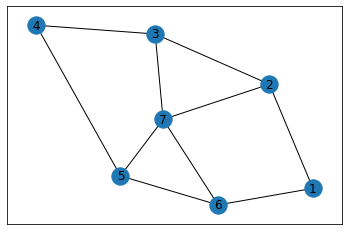

In [69]:
#Visualisasi
nx.draw_networkx(G=G,with_labels=True,)
plt.show()

In [52]:
panjang_graph = len(G.degree)
#buat matrix panjang x panjang
list_connection = np.zeros((panjang_graph,panjang_graph),dtype='int')

for node,adjacent in G.adj.items():
    list_adjacent = np.array([int(x) for x in adjacent])
    print(node,list_adjacent)
    list_connection[node-1][node-1]=1
    for x in list_adjacent:
        list_connection[x-1][node-1] = 1
        list_connection[node-1][x-1] = 1

# print(list_connection)
df = pd.DataFrame(data=list_connection)
df.index +=1
df.columns += 1
df


1 [2 6]
2 [1 3 7]
6 [1 5 7]
3 [2 4 7]
7 [2 3 5 6]
4 [3 5]
5 [4 6 7]


,1,2,3,4,5,6,7
1,1,1,0,0,0,1,0
2,1,1,1,0,0,0,1
3,0,1,1,1,0,0,1
4,0,0,1,1,1,0,0
5,0,0,0,1,1,1,1
6,1,0,0,0,1,1,1
7,0,1,1,0,1,1,1


In [60]:
dfs = nx.dfs_edges(G=G,source=1,depth_limit=2)
print(list(dfs))
# print(list(dfs.adj.items()))

[(1, 2), (2, 3), (2, 7), (1, 6), (6, 5)]


In [61]:
bfs = nx.bfs_edges(G,source=1,depth_limit=2)
print(list(bfs))

[(1, 2), (1, 6), (2, 3), (2, 7), (6, 5)]
